In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# **Q.4 A first Gibbs sampler**

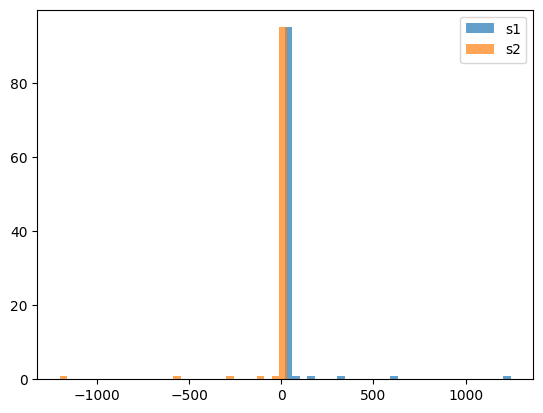

In [24]:
import numpy as np
from numpy.linalg import inv
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    sigMatrix = np.array([[sigma, 0],[0,sigma]])
    AtA = np.array([[1,-1],[-1,1]])
    cond_var = inv(inv(sigMatrix) + (1/beta**2)*AtA)
    muMatrix = np.array([[mu],[mu]])
    At = np.array([[1],[-1]])
    cond_mean = cond_var @ (inv(sigMatrix) @ muMatrix + (t/beta**2)*At)
    return np.random.normal(cond_mean[0][0], np.sqrt(cond_var[0][0]))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    sigMatrix = np.array([[sigma, 0],[0,sigma]])
    A = np.array([[1,-1],[-1,1]])
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_var = inv(inv(sigMatrix) + (1/beta**2)*A)
    muMatrix = np.array([[mu],[mu]])
    A2 = np.array([[1],[-1]])
    cond_mean = cond_var @(inv(sigMatrix) @ muMatrix + (t/beta**2)*A2)
    return np.random.normal(cond_mean[1][0], np.sqrt(cond_var[1][1]))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 100
y = 1  # Player 1 wins
burn_in = 100
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)
# Example: Run Gibbs Sampler with 1000 iterations

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()
plt.show()

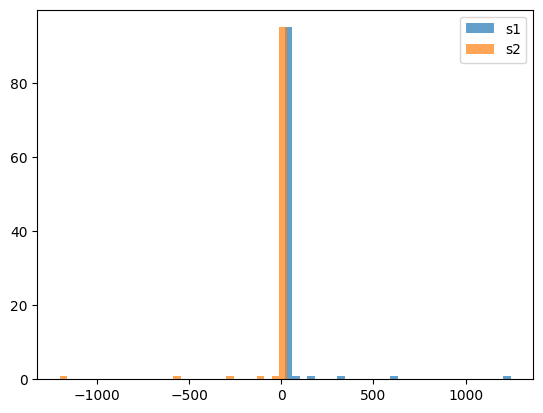

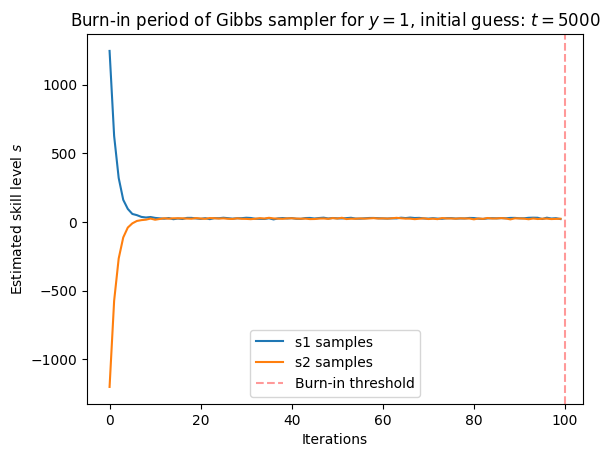

In [25]:
# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

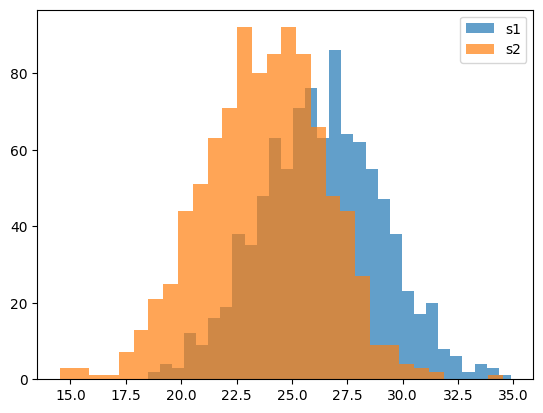

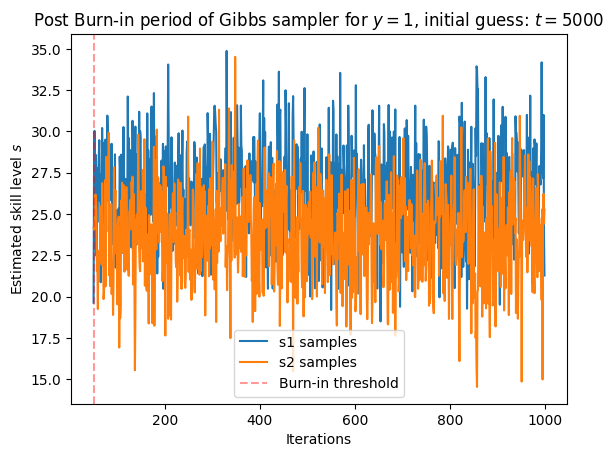

In [26]:
# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y, burn_in):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)
            iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
burn_in = 50
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y, burn_in)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Post Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

# **Q.5 Assumed Density Filtering (Moment matching)**

In [27]:
# Loading in the raw SerieA file url from Github
#Can be accessed from: https://github.com/dannem1337/APML-Project/blob/main/data/SerieA.csv
#Copy "Raw"
import pandas as pd

#url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WTMF422SMTEA3XBPYZXWLCXA'
serieA = pd.read_csv("data/SerieA.csv", na_values='?', dtype={'ID': str}).dropna()
print(serieA)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [28]:
url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WTMF422SMTEA3XBPYZXWLCXA'
serieA2 = pd.read_csv("data/SerieA.csv", na_values='?', dtype={'ID': str}).dropna()
print(serieA2)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [29]:
serieA2['winner'] = serieA2.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA2.drop(serieA2.loc[serieA2['winner'] == 'TIE'].index, inplace=True)

serieA2['y'] = serieA2.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# Reset index and reassign
serieA2.reset_index(drop=True, inplace=True)

# Assuming you already have the dataframe 'df'
# Create a new column 'loser' which is the team that lost
serieA2['loser'] = serieA2.apply(lambda row: row['team1'] if row['winner'] == row['team2'] else row['team2'], axis=1)

# Calculate wins: count how many times each team appears as the winner
wins = serieA2['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']

# Calculate losses: count how many times each team appears as the loser
losses = serieA2['loser'].value_counts().reset_index()
losses.columns = ['team', 'losses']

# Merge the wins and losses dataframes
team_stats = pd.merge(wins, losses, on='team', how='outer').fillna(0)

# Convert wins and losses to integer type
team_stats['wins'] = team_stats['wins'].astype(int)
team_stats['losses'] = team_stats['losses'].astype(int)
print(team_stats)

          team  wins  losses
0     Atalanta    20       9
1      Bologna    11      16
2     Cagliari    10      17
3       Chievo     2      22
4       Empoli    10      20
5   Fiorentina     8      13
6    Frosinone     5      23
7        Genoa     8      16
8        Inter    20       9
9     Juventus    28       4
10       Lazio    17      13
11       Milan    19       8
12      Napoli    24       7
13       Parma    10      17
14        Roma    18       8
15   Sampdoria    15      15
16    Sassuolo     9      13
17        Spal    11      18
18      Torino    16       7
19     Udinese    11      17


In [30]:
serieA['winner'] = serieA.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA.drop(serieA.loc[serieA['winner'] == 'TIE'].index, inplace=True)

serieA['y'] = serieA.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# serieA.drop(serieA[['yyyy-mm-dd', 'HH:MM', 'score1', 'score2']])

# Reset index and reassign
serieA.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(serieA)

     yyyy-mm-dd  HH:MM     team1     team2  score1  score2    winner  y
0    2018-08-18  18:00    Chievo  Juventus       2       3  Juventus -1
1    2018-08-18  20:30     Lazio    Napoli       1       2    Napoli -1
2    2018-08-19  18:00    Torino      Roma       0       1      Roma -1
3    2018-08-19  20:30  Sassuolo     Inter       1       0  Sassuolo  1
4    2018-08-19  20:30    Empoli  Cagliari       2       0    Empoli  1
..          ...    ...       ...       ...     ...     ...       ... ..
267  2019-05-26  20:30      Spal     Milan       2       3     Milan -1
268  2019-05-26  20:30      Roma     Parma       2       1      Roma  1
269  2019-05-26  20:30     Inter    Empoli       2       1     Inter  1
270  2019-05-26  20:30  Cagliari   Udinese       1       2   Udinese -1
271  2019-05-26  20:30  Atalanta  Sassuolo       3       1  Atalanta  1

[272 rows x 8 columns]


In [31]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_dict = {}

for i in All_teams:
    All_teams_dict[i] = mu, sigma

All_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [32]:
game1 = serieA.iloc[0][['team1', 'team2', 'winner']].to_list()
print(game1)

for i in game1:
    print(f"{i} : {All_teams_dict[i]}")

['Chievo', 'Juventus', 'Juventus']
Chievo : (25, 8.333)
Juventus : (25, 8.333)
Juventus : (25, 8.333)


In [33]:
# x,y = All_teams_dict['Juventus']
# print(x,y)

In [34]:
# for index, row in serieA.iterrows():
#     print(row['team1'], "-", row['team2'], "| winner:", row['winner'], "=>", row['y'])

In [35]:
beta = 4.1666
mu = 25  # prior mean for both players
sigma = 8.333

def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 1000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1) #New mu is based on the average of the distributions
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2) #Not sure if this is the way it's supposed to be used

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_dict[team1]
        mu2, sigma2 = All_teams_dict[team2]

        update_ranking(All_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)


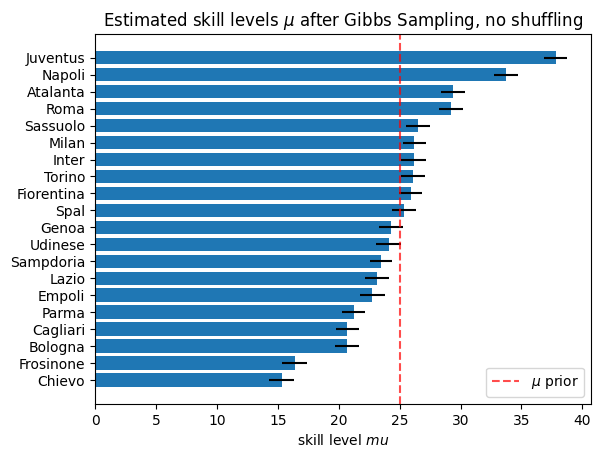

In [36]:
teams_sorted_by_skill = dict(sorted(All_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]
sorted_uncertainty_list = [i[1] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list, xerr=sorted_uncertainty_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, no shuffling')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

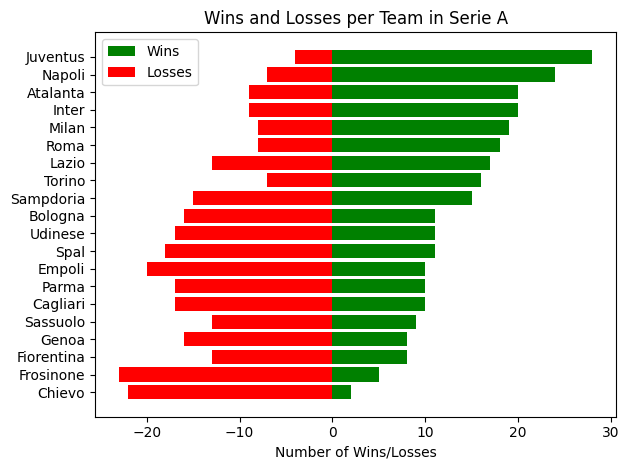

In [37]:
# Sort the data by wins for a clearer visualization
team_stats = team_stats.sort_values('wins', ascending=True)

# Plot wins as horizontal bars
plt.barh(team_stats['team'], team_stats['wins'], color='green', label='Wins')

# Plot losses as horizontal bars, slightly shifted to the right for better visibility
plt.barh(team_stats['team'], -team_stats['losses'], color='red', label='Losses')

# Add labels and title
plt.xlabel('Number of Wins/Losses')
plt.title('Wins and Losses per Team in Serie A')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [38]:
# shuffle the DataFrame rows
shuffled_serieA = serieA.sample(frac = 1)
shuffled_serieA

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,winner,y
94,2018-11-25,12:30,Parma,Sassuolo,2,1,Parma,1
31,2018-09-22,18:00,Fiorentina,Spal,3,0,Fiorentina,1
75,2018-10-29,20:30,Lazio,Inter,0,3,Inter,-1
56,2018-10-06,15:00,Cagliari,Bologna,2,0,Cagliari,1
266,2019-05-26,18:00,Sampdoria,Juventus,2,0,Sampdoria,1
...,...,...,...,...,...,...,...,...
171,2019-02-23,20:30,Frosinone,Roma,2,3,Roma,-1
249,2019-05-11,15:00,Atalanta,Genoa,2,1,Atalanta,1
143,2019-01-27,15:00,Parma,Spal,2,3,Spal,-1
93,2018-11-24,20:30,Inter,Frosinone,3,0,Inter,1


In [39]:
teams1 = shuffled_serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

Shuffled_teams_dict = {}

for i in All_teams:
    Shuffled_teams_dict[i] = mu, sigma

Shuffled_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [40]:
def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 10000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1)
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2)

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in shuffled_serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = Shuffled_teams_dict[team1]
        mu2, sigma2 = Shuffled_teams_dict[team2]

        update_ranking(Shuffled_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

print(Shuffled_teams_dict)

KeyboardInterrupt: 

In [ ]:
teams_sorted_by_skill = dict(sorted(Shuffled_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]
sorted_uncertainty_list = [i[1] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list, xerr=sorted_uncertainty_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, shuffled dataset')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

In [ ]:
All_teams_dict

In [ ]:
Shuffled_teams_dict

# **Q6 Using the model for predictions**

In [ ]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_clean_dict = {}

for i in All_teams:
    All_teams_clean_dict[i] = mu, sigma

All_teams_clean_dict

In [ ]:
def prediction(mu1, mu2):
    return 1 if mu1 > mu2 else -1

correct_guess = 0
total_guess = 0

#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_clean_dict[team1]
        mu2, sigma2 = All_teams_clean_dict[team2]

        pred = prediction(mu1, mu2)
        if pred == y:
            correct_guess += 1

        update_ranking(All_teams_clean_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

        total_guess += 1

print(All_teams_clean_dict)
print(f"total guesses = {total_guess}")
print(f"correct guesses = {correct_guess}")
print(f"r = {correct_guess/total_guess}")

#Q.9 Your own data

In [ ]:
import pandas as pd
import os
from google.colab import drive
if not os.path.isdir('/content/drive'):
  drive.mount('/content/drive')
  os.chdir('drive/MyDrive/mums')
  os.getcwd()
  !ls

data_fights = pd.read_csv('fights_with_winner.csv', delimiter=';')
data_fighters = pd.read_csv('ufc-fighters-statistics.csv', delimiter=',')

data_fights = data_fights.dropna(subset=['Winner'])
data_fights.reset_index(inplace = True, drop = True)

data_fighters = data_fighters[['name','wins','losses','draws']]
data_fighters = data_fighters.drop_duplicates(subset='name', keep='first')

# Assuming data_fighters and data_fights are already loaded

# Step 1: Extract the unique names from R_fighter and B_fighter columns in data_fights
fighters_in_fights = pd.concat([data_fights['R_fighter'], data_fights['B_fighter']]).unique()

# Step 2: Filter data_fighters to keep only rows where 'name' appears in fighters_in_fights
filtered_fighters = data_fighters[data_fighters['name'].isin(fighters_in_fights)]
filtered_fighters.reset_index(inplace = True, drop = True)
# Now `filtered_fighters` contains only the fighters that appear in R_fighter or B_fighter

#Add new column y
data_fights['y'] = data_fights.apply((lambda x: 1 if x['Winner'] == x['R_fighter'] else -1), axis=1)
print(data_fights)

#adding 0.5 to (win/total matches) and times 25 for adequate prior
filtered_fighters['prior skill'] = filtered_fighters.apply(lambda x: ((x['wins']/(x['wins']+x['losses']+x['draws'])+0.5)*25), axis=1)

print(filtered_fighters)



In [ ]:
all_fighters_dict = {}

sigma = 8.333

names = filtered_fighters['name']

prior_skills = filtered_fighters['prior skill']


for i in range(len(names)):
  all_fighters_dict[names[i]] = prior_skills[i], sigma

all_fighters_dict

In [ ]:
def ufc_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 1000
    burn_in = 50
    samples_s1, samples_s2 = ufc_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1)
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2)

# #"MAIN" for running update_ranking function
# #Iterate over each row and update the mu for each team
# for index, row in data_fights.iterrows():
#         y = row['y']
#         team1 = row['R_fighter']
#         team2 = row['B_fighter']
#         if team1 not in all_fighters_dict:
#           all_fighters_dict[team1] = 25, sigma
#         if team2 not in all_fighters_dict:
#           all_fighters_dict[team2] = 25, sigma
#         mu1, sigma1 = all_fighters_dict[team1]
#         mu2, sigma2 = all_fighters_dict[team2]

#         update_ranking(all_fighters_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)
#         if index%1000==0:
#           print(index)
# print(all_fighters_dict)

In [ ]:
def prediction(mu1, mu2):
    return 1 if mu1 > mu2 else -1

correct_guess = 0
total_guess = 0

for index, row in data_fights.iterrows():
        y = row['y']
        team1 = row['R_fighter']
        team2 = row['B_fighter']
        if team1 not in all_fighters_dict:
          all_fighters_dict[team1] = 25, sigma
        if team2 not in all_fighters_dict:
          all_fighters_dict[team2] = 25, sigma
        mu1, sigma1 = all_fighters_dict[team1]
        mu2, sigma2 = all_fighters_dict[team2]

        pred = prediction(mu1, mu2)
        if pred == y:
            correct_guess += 1

        update_ranking(all_fighters_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

        total_guess += 1

        if index%1000==0:
          print(index)

print(all_fighters_dict)
print(f"total guesses = {total_guess}")
print(f"correct guesses = {correct_guess}")
print(f"r = {correct_guess/total_guess}")